In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data.head()


,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2


In [ ]:
#y = w*x + b
x = data["YearsExperience"]
y = data["Salary"]

In [ ]:
#colab do not support chinese word
!pip install wget
import wget

wget.download('https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf')

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=98185231f0dca4cd197d8b83a7f2be47deed612a80c0cd986b56aec58d628c33
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

In [ ]:
import matplotlib as mpl
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

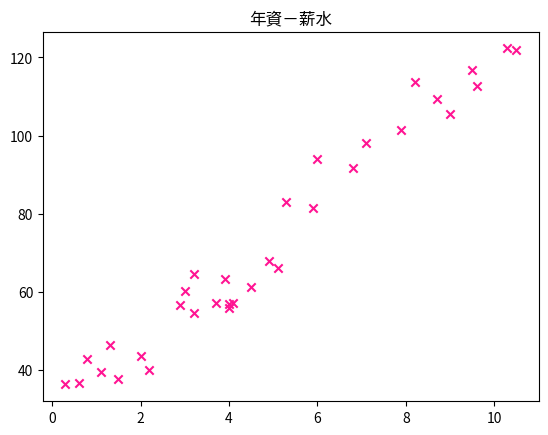

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family = 'ChineseFont')


plt.scatter(x,y, marker = 'x', color = '#FF1493')
plt.title('年資－薪水')
#plt.rcParams['axes.facecolor'] = 'white'

plt.show()

###mpl.style.use("dark_background")

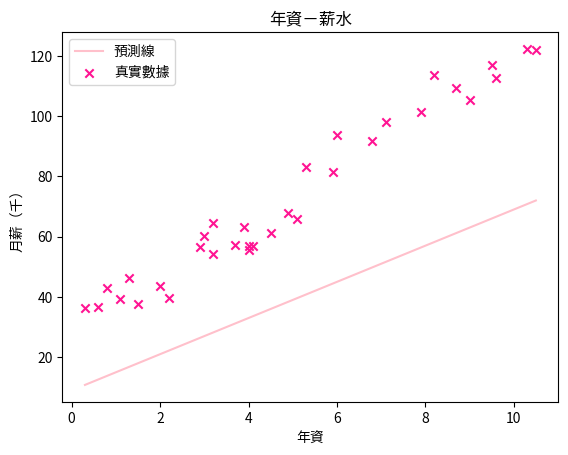

In [ ]:
#w = 0
#b = 0

def plot_pred(w,b):
  y_pred = x*w + b
  plt.plot(x, y_pred, color="pink", label = '預測線')
  plt.scatter(x,y, marker = 'x', color = '#FF1493', label = "真實數據")
  plt.title('年資－薪水')
  plt.xlabel('年資')
  plt.ylabel('月薪（千）')
  plt.legend()
  plt.show()

plot_pred(6,9)

In [ ]:
from ipywidgets import interact

interact(plot_pred, w=(-100, 100, 1), b=(-100, 100, 1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

#Cost function

In [ ]:
#y = w*x + b
x = data["YearsExperience"]
y = data["Salary"]

In [ ]:
w = 10
b = 0

y_pred = w*x + b
cost = (y-y_pred)**2
cost.sum()/len(x)

602.547878787879

In [ ]:
def compute_cost(x,y,w,b):
  y_pred = w*x + b
  cost = (y-y_pred)**2
  cost = cost.sum()/len(x)

  return cost

In [ ]:
compute_cost(x,y,10,10)

227.88121212121214

In [ ]:
# b = 0 w = -100~100 cost 會是多少

costs = []

for w in range(-100, 101):
  cost = compute_cost(x, y, w, 0)
  costs.append(cost)

costs

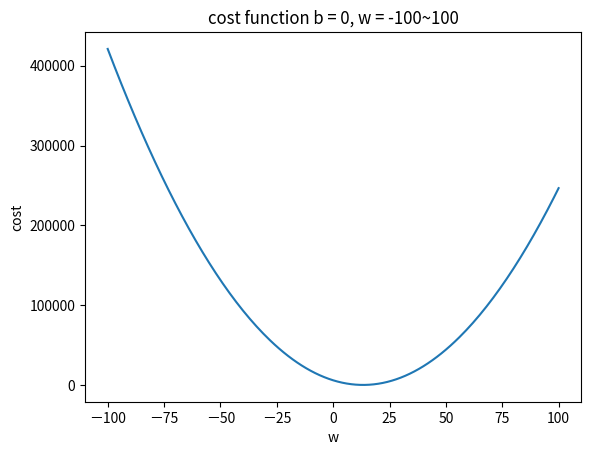

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(-100,101), costs)
plt.title('cost function b = 0, w = -100~100')
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

In [ ]:
#w = -100~100 , b=-100~100 的cost

import numpy as np

ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))

i = 0
for w in ws :
  j = 0
  for b in bs:
    cost = compute_cost(x,y,w,b)
    costs[i,j] = cost
    j = j+1
  i = i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

32.6948484848485
當w = [9], b = [29] 會有最小cost :[32.69484848]


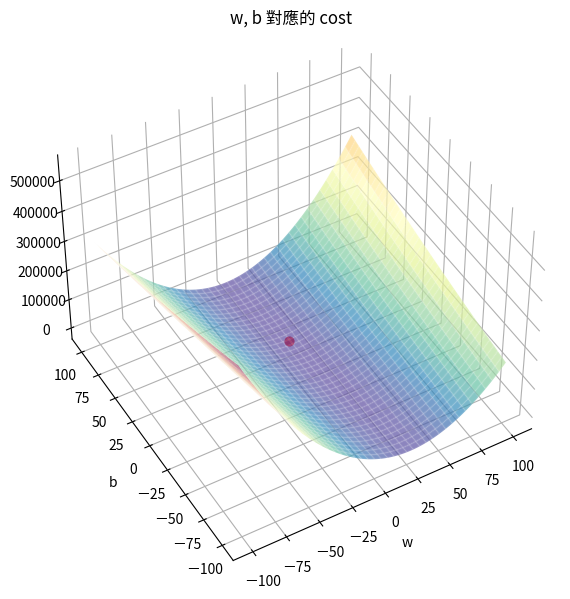

In [ ]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.view_init(45,-120) #旋轉軸（上下 ,左右
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))

b_grid, w_grid = np.meshgrid(bs,ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
ax.plot_surface(w_grid, b_grid, costs, cmap = "Spectral_r", alpha=0.7) #cmap 設定顏色
ax.plot_wireframe(w_grid, b_grid, costs, color = 'white', alpha = 0.1) #編筐顏色
ax.set_title('w, b 對應的 cost')
ax.set_xlabel('w')
ax.set_ylabel('b')

#找出最低的costs
print(np.min(costs))
#找出最低的costs所對應的w and b
w_index, b_index = np.where(costs == np.min(costs))
print(f'當w = {ws[w_index]}, b = {bs[b_index]} 會有最小cost :{costs[w_index, b_index]}')
#畫出最小的點
ax.scatter(ws[w_index],  bs[b_index], costs[w_index, b_index], color = 'red' , s = 40)
plt.show()

#Grandient  descent = 根據斜率改變參數

In [ ]:
#微分計算出點的切線斜率
#learning rate  = 步伐大小
#learning rate too large might can not find the lower point
#越靠近最低點 斜率越小

In [ ]:
# w方向斜率 = 2x(w*x+b-y)
# b方向斜率 = 2(w*x+b-y)

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)

x = data["YearsExperience"]
y = data["Salary"]

In [ ]:
w = 10
b = 10
w_grandient = 2*x*(w*x+b-y)
b_grandient = 2*(w*x+b-y) #每筆資料帶入的b斜率 ()

b_grandient

0    -46.4
1    -41.2
2    -49.6
3    -36.6
4    -46.4
5    -25.4
6    -27.0
7    -15.6
8    -35.2
9    -40.2
10   -24.8
11   -44.8
12   -20.2
13   -28.4
14   -11.4
15   -13.8
16   -12.0
17   -12.2
18   -17.8
19   -10.0
20   -40.0
21   -24.6
22   -47.8
23   -27.4
24   -34.4
25   -24.6
26   -43.6
27   -24.8
28   -11.0
29   -23.8
30   -13.2
31   -18.6
32   -13.6
dtype: float64

In [ ]:
#平均斜率
def compute_gradient(x,y,w,b):
  w_gradient = (2*x*(w*x+b-y)).mean()
  b_gradient = (2*(w*x+b-y)).mean()
  return w_gradient, b_gradient

In [ ]:
compute_gradient(x,y,20,10)

(537.0951515151515, 70.16969696969697)

In [ ]:
w = 0
b = 0
learning_rate = 0.001
w_gradient, b_gradient = compute_gradient(x,y,w,b)
print(compute_cost(x,y,w,b))

w = w-w_gradient*learning_rate
b = b-b_gradient*learning_rate
print(compute_cost(x,y,w,b))

6040.596363636363
5286.0782714844245


In [ ]:
w = 0
b = 0
learning_rate = 0.001

for i in range(20000):
  w_gradient, b_gradient = compute_gradient(x, y, w, b)

  w = w-w_gradient*learning_rate
  b = b-b_gradient*learning_rate
  cost = compute_cost(x,y,w,b)
  if i%1000 ==0: #1000次才印出來
    print(f'Iteration {i:5} : Cost{cost:.3f}, w:{w:.3f}, b:{b: .3f}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e} ')
  # :.3f 小數點後３位
  # iteration :5 對齊
  # .2e  科學記號

Iteration     0 : Cost5286.078, w:0.872, b: 0.145, w_gradient: -8.72e+02, b_gradient: -1.45e+02 
Iteration  1000 : Cost96.020, w:11.416, b: 12.744, w_gradient:  1.22e+00, b_gradient: -8.15e+00 
Iteration  2000 : Cost54.275, w:10.468, b: 19.060, w_gradient:  7.18e-01, b_gradient: -4.78e+00 
Iteration  3000 : Cost39.926, w:9.912, b: 22.763, w_gradient:  4.21e-01, b_gradient: -2.80e+00 
Iteration  4000 : Cost34.993, w:9.586, b: 24.934, w_gradient:  2.47e-01, b_gradient: -1.64e+00 
Iteration  5000 : Cost33.298, w:9.395, b: 26.207, w_gradient:  1.45e-01, b_gradient: -9.63e-01 
Iteration  6000 : Cost32.715, w:9.283, b: 26.953, w_gradient:  8.48e-02, b_gradient: -5.65e-01 
Iteration  7000 : Cost32.515, w:9.217, b: 27.391, w_gradient:  4.97e-02, b_gradient: -3.31e-01 
Iteration  8000 : Cost32.446, w:9.178, b: 27.648, w_gradient:  2.92e-02, b_gradient: -1.94e-01 
Iteration  9000 : Cost32.422, w:9.156, b: 27.798, w_gradient:  1.71e-02, b_gradient: -1.14e-01 
Iteration 10000 : Cost32.414, w:9.143

In [ ]:
#define function
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient =  gradient_function(x, y, w, b)

    w = w-w_gradient*learning_rate
    b = b-b_gradient*learning_rate
    cost = cost_function(x,y,w,b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)


    if i%p_iter ==0:
     print(f'Iteration {i:5} : Cost{cost: .4e}, w:{w: .2e}, b:{b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e} ')

  return w, b , w_hist, b_hist, c_hist




In [ ]:
w_init = 0
b_init = 0
learning_rate = 1.0e-3
run_iter = 20000


w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration     0 : Cost 5.2861e+03, w: 8.72e-01, b: 1.45e-01, w_gradient: -8.72e+02, b_gradient: -1.45e+02 
Iteration  1000 : Cost 9.6020e+01, w: 1.14e+01, b: 1.27e+01, w_gradient:  1.22e+00, b_gradient: -8.15e+00 
Iteration  2000 : Cost 5.4275e+01, w: 1.05e+01, b: 1.91e+01, w_gradient:  7.18e-01, b_gradient: -4.78e+00 
Iteration  3000 : Cost 3.9926e+01, w: 9.91e+00, b: 2.28e+01, w_gradient:  4.21e-01, b_gradient: -2.80e+00 
Iteration  4000 : Cost 3.4993e+01, w: 9.59e+00, b: 2.49e+01, w_gradient:  2.47e-01, b_gradient: -1.64e+00 
Iteration  5000 : Cost 3.3298e+01, w: 9.39e+00, b: 2.62e+01, w_gradient:  1.45e-01, b_gradient: -9.63e-01 
Iteration  6000 : Cost 3.2715e+01, w: 9.28e+00, b: 2.70e+01, w_gradient:  8.48e-02, b_gradient: -5.65e-01 
Iteration  7000 : Cost 3.2515e+01, w: 9.22e+00, b: 2.74e+01, w_gradient:  4.97e-02, b_gradient: -3.31e-01 
Iteration  8000 : Cost 3.2446e+01, w: 9.18e+00, b: 2.76e+01, w_gradient:  2.92e-02, b_gradient: -1.94e-01 
Iteration  9000 : Cost 3.2422e+01, w:

In [ ]:
print(f'最終的w , b = ({w_final:.2f}, {b_final:.2f})')

最終的w , b = (9.12, 28.01)


In [ ]:
print(f'年資3.5, 預測薪水：{w_final*3.5 + b_final:.1f}k')

年資3.5, 預測薪水：59.9k


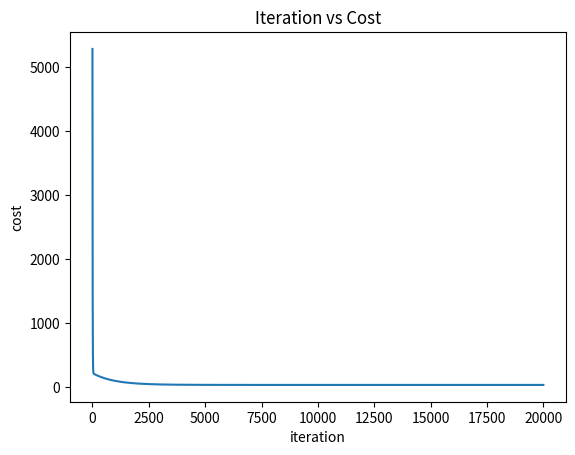

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,20000), c_hist)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Iteration vs Cost')
plt.show()

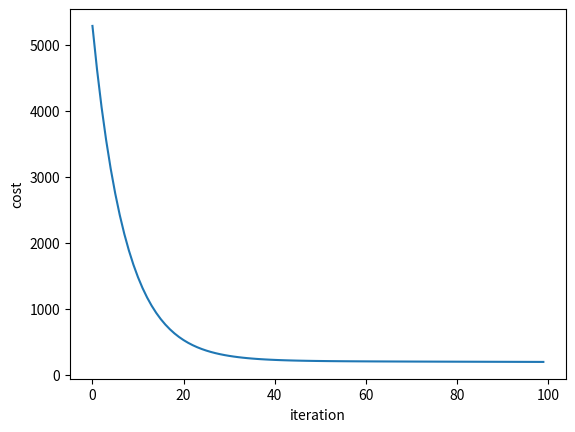

In [ ]:
#若只想看前１００
plt.plot(np.arange(0,100), c_hist[:100])
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [ ]:
#w = -100~100 , b=-100~100 的cost

import numpy as np

ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))

i = 0
for w in ws :
  j = 0
  for b in bs:
    cost = compute_cost(x,y,w,b)
    costs[i,j] = cost
    j = j+1
  i = i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

32.6948484848485
當w = [9], b = [29] 會有最小cost :[32.69484848]


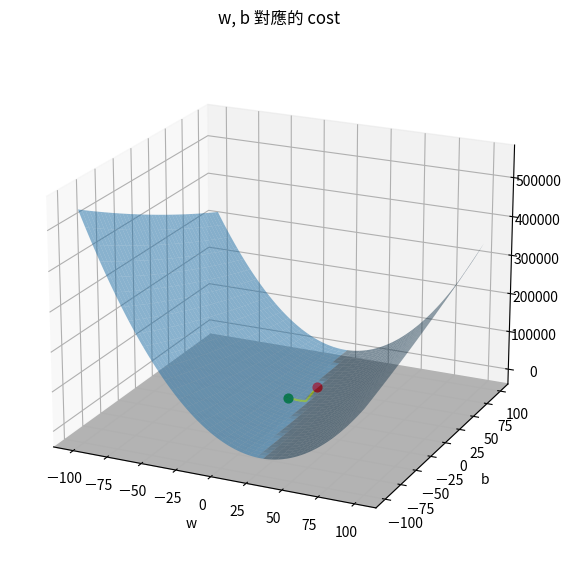

In [ ]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.view_init(20,-65) #旋轉軸（上下 ,左右
ax.xaxis.set_pane_color ="silver"
ax.yaxis.set_pane_color = "silver"
ax.zaxis.set_pane_color((0.7,0.7,0.7))

b_grid, w_grid = np.meshgrid(bs,ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
ax.plot_surface(w_grid, b_grid, costs, alpha=0.5) #cmap 設定顏色
#ax.plot_wireframe(w_grid, b_grid, costs, color = 'black', alpha = 0.1) #編筐顏色
ax.set_title('w, b 對應的 cost')
ax.set_xlabel('w')
ax.set_ylabel('b')

#ax.set_facecolor(color="white")


#找出最低的costs
print(np.min(costs))
#找出最低的costs所對應的w and b
w_index, b_index = np.where(costs == np.min(costs))
print(f'當w = {ws[w_index]}, b = {bs[b_index]} 會有最小cost :{costs[w_index, b_index]}')
#畫出最小的點
ax.scatter(ws[w_index],  bs[b_index], costs[w_index, b_index], color = 'red' , s = 40)


ax.scatter(w_hist[0],b_hist[0],c_hist[0], color='green', s=40) #初始點
ax.plot(w_hist, b_hist, c_hist , color = 'yellow')

plt.show()